In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [6]:
df = pd.read_csv("../soil.csv")
df.head(30)

FileNotFoundError: [Errno 2] No such file or directory: '../soil.csv'

In [7]:
df['Satellite_Observation_Date'] = pd.to_datetime(df['Satellite_Observation_Date'], errors='coerce')
df['Year'] = df['Satellite_Observation_Date'].dt.year
df['Month'] = df['Satellite_Observation_Date'].dt.month
df['Day'] = df['Satellite_Observation_Date'].dt.day

KeyError: 'Satellite_Observation_Date'

In [ ]:
#Dropping unused columns
df = df.drop(['Remarks'], axis='columns')

In [ ]:
categorical_columns = [ 'Land_Use_Type', 'Season', 'Crop_Suitability']
df['Soil_Type'] = df['Soil_Type'].replace(['Clay', 'Loamy', 'Peaty', 'Sandy', 'Silt'], [1, 2, 3, 4, 5])
df['Season'] = df['Season'].replace(['Summer', 'Autumn', 'Winter', 'Monsoon'], [1, 2, 3, 4])
df['Land_Use_Type'] = df['Land_Use_Type'].replace(['Barren', 'Residential', 'Unused', 'Agricultural'], [1, 2, 3, 4])
df['Crop_Suitability'] = df['Crop_Suitability'].replace({'Rice': 0, 'Tea': 1, 'Spices':2, 'Wheat':3, 'Jute':4, 'Vegetables':5, 'Maize':6})

/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Soil_Type'] = df['Soil_Type'].replace(['Clay', 'Loamy', 'Peaty', 'Sandy', 'Silt'], [1, 2, 3, 4, 5])
/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Season'] = df['Season'].replace(['Summer', 'Autumn', 'Winter', 'Monsoon'], [1, 2, 3, 4])
/var/folders/tv/tm7xmb6555lftyx74scpw9r40000gq/T/ipykernel_80546/2234263003.py:4: F

In [ ]:
df.head(40)

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Year,Month,Day
0,Sylhet,2,62,4,72,28.6,3,4,2024-09-24,2024,9,24
1,Dhaka,4,63,3,118,23.8,6,2,2024-01-31,2024,1,31
2,Rangpur,3,51,4,106,32.0,6,2,2024-03-11,2024,3,11
3,Khulna,4,67,1,336,31.6,3,2,2024-09-29,2024,9,29
4,Rangpur,3,63,4,237,20.1,0,3,2024-04-01,2024,4,1
5,Rajshahi,1,58,1,345,29.3,5,4,2024-01-12,2024,1,12
6,Rajshahi,5,68,1,324,33.8,1,3,2024-09-06,2024,9,6
7,Chattogram,2,49,4,71,27.0,4,1,2024-08-05,2024,8,5
8,Barishal,5,64,4,157,22.1,5,4,2024-12-21,2024,12,21
9,Dhaka,4,61,2,301,27.9,0,2,2024-03-01,2024,3,1


In [ ]:
df.describe()

,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Year,Month,Day
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.0,2000.000000,2000.000000
mean,2.974500,70.10450,2.501000,223.136000,27.330250,3.019500,2.451500,2024-07-02 02:06:43.200000,2024.0,6.550000,15.231500
min,1.000000,40.00000,1.000000,50.000000,20.000000,0.000000,1.000000,2024-01-01 00:00:00,2024.0,1.000000,1.000000
25%,2.000000,54.00000,1.000000,137.000000,23.500000,1.000000,1.000000,2024-04-04 00:00:00,2024.0,4.000000,8.000000
50%,3.000000,70.00000,3.000000,222.500000,27.300000,3.000000,2.000000,2024-07-03 00:00:00,2024.0,7.000000,15.000000
75%,4.000000,86.00000,3.000000,308.000000,31.000000,5.000000,3.000000,2024-09-30 00:00:00,2024.0,9.000000,23.000000
max,5.000000,100.00000,4.000000,400.000000,35.000000,6.000000,4.000000,2024-12-31 00:00:00,2024.0,12.000000,31.000000
std,1.397436,17.97699,1.111583,100.548543,4.341251,2.025135,1.122621,NaN,0.0,3.412964,8.788488


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import cross_val_score

In [ ]:
#Basic Random Forest Classifier

X = df[['Fertility_Index', 'Average_Rainfall(mm)', 'Temperature(°C)', 'Month', 'Soil_Type', 'Season']]
y = df['Crop_Suitability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42, max_depth=80, n_estimators=500, max_leaf_nodes=10, max_features='log2')
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)
print(test_accuracy)
print(val_accuracy)

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))



0.0875
0.1125
Cross-validation scores: [0.15625   0.15625   0.15625   0.1875    0.15625   0.1328125 0.1484375
 0.1875    0.1171875 0.1796875]
Average cross-validation score: 0.16
Standard deviation of cross-validation scores: 0.02


In [ ]:
#SVM(Support Vector Machines)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(gamma=0.1, C=0.0002)

svm.fit(X_train, y_train)
val_predictions=svm.predict(X_val)
test_predictions=svm.predict(X_test)

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(val_accuracy)
print(test_accuracy)

scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

0.1125
0.16
Cross-validation scores: [0.1640625 0.1640625 0.1640625 0.15625   0.1640625 0.1640625 0.1640625
 0.1640625 0.1640625 0.1640625]
Average cross-validation score: 0.16
Standard deviation of cross-validation scores: 0.00


In [ ]:
#
import gc
from tensorflow.keras.regularizers import l2

print(X_train.shape)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape =(6,)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(7)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


class garbage_collect_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    gc.collect()

history = model.fit(X_train, # Train examples
          y_train, # Train labels
          epochs=100, # number of epochs (passes through data during training)
          batch_size= 100, # number of points to consider in each optimizer iteration
          callbacks = [garbage_collect_callback()],
          validation_data=(X_val, y_val), #data to use for validation
          verbose=1) #will print information about optimization process

test_binary_pred = model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('\nTesting model on mock_test set:')
print(f'Model Loss: {scores[0]:.3f}, Model Accuracy: {scores[1]:.3f}')

(1280, 6)
Epoch 1/100
13/13 [==============================] - 1s 33ms/step - loss: 18.6312 - accuracy: 0.1312 - val_loss: 5.1339 - val_accuracy: 0.1469
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 8.8117 - accuracy: 0.1344 - val_loss: 3.6657 - val_accuracy: 0.1344
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 5.6723 - accuracy: 0.1484 - val_loss: 3.3180 - val_accuracy: 0.1625
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 4.1635 - accuracy: 0.1297 - val_loss: 3.1942 - val_accuracy: 0.1031
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 3.5859 - accuracy: 0.1469 - val_loss: 3.1296 - val_accuracy: 0.1375
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 3.3361 - accuracy: 0.1508 - val_loss: 3.0795 - val_accuracy: 0.1406
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 3.1762 - accuracy: 0.1484 - val_loss: 3.0362 - val_accuracy: 0.

In [12]:
df = pd.read_csv('../yield_df.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [13]:
df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})

/var/folders/ld/rlnxgk4105j7hv9h9ltwc68c0000gn/T/ipykernel_73388/2323293384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Item'] = df['Item'].replace({'Cassava':0, 'Maize':1, 'Plantains and others':2, 'Potatoes':3, 'Rice, paddy':4, 'Sorghum':5, 'Soybeans':6, 'Sweet potatoes':7, 'Wheat':8, 'Yams':9})


In [14]:
df = df.drop(['Unnamed: 0'], axis='columns')
low_counts = df['Area'].value_counts()
to_drop = low_counts[low_counts<100].index.tolist()
df_drop = df[~df['Area'].isin(low_counts)]
df = df.reset_index(drop=True)

In [15]:
df.head(10)


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1990,36613,1485.0,121.0,16.37
1,Albania,3,1990,66667,1485.0,121.0,16.37
2,Albania,4,1990,23333,1485.0,121.0,16.37
3,Albania,5,1990,12500,1485.0,121.0,16.37
4,Albania,6,1990,7000,1485.0,121.0,16.37
5,Albania,8,1990,30197,1485.0,121.0,16.37
6,Albania,1,1991,29068,1485.0,121.0,15.36
7,Albania,3,1991,77818,1485.0,121.0,15.36
8,Albania,4,1991,28538,1485.0,121.0,15.36
9,Albania,5,1991,6667,1485.0,121.0,15.36


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Item'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'hg/ha_yield'}>,
        <Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

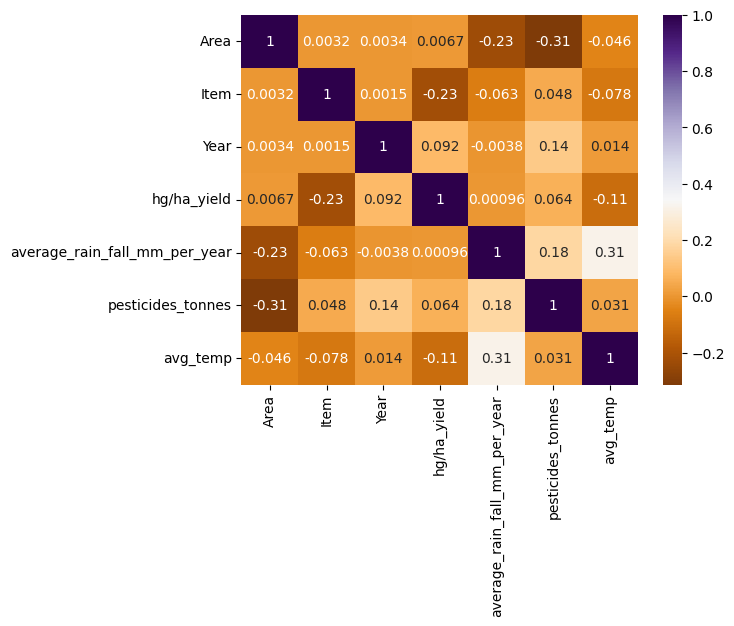

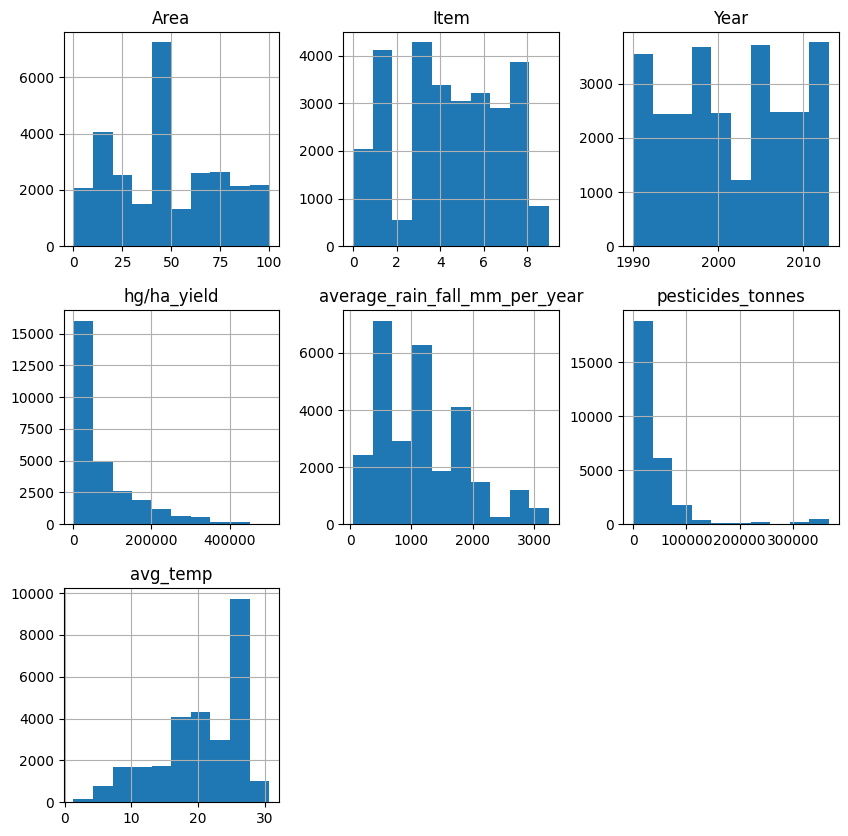

In [17]:
import seaborn as sns

sns.heatmap(df.corr(), annot= True , cmap='PuOr')

df.hist(figsize=(10,10))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


X_train = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y_train = df[['hg/ha_yield']]




In [24]:
df.head(20)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37
5,0,8,1990,30197,1485.0,121.0,16.37
6,0,1,1991,29068,1485.0,121.0,15.36
7,0,3,1991,77818,1485.0,121.0,15.36
8,0,4,1991,28538,1485.0,121.0,15.36
9,0,5,1991,6667,1485.0,121.0,15.36


In [25]:
#RANDOM FOREST REGRESSOR
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42, n_estimators=500,  criterion='squared_error')
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Calculate accuracy
test_accuracy = mean_absolute_error(y_test, test_predictions)
val_accuracy = mean_absolute_error(y_val, val_predictions)
print(test_accuracy)
print(val_accuracy)

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5944.538406159584
5468.037335404027


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

Cross-validation scores: [0.97540154 0.96806267 0.96182084 0.97505945 0.96782709 0.9694954
 0.96813309 0.96612736 0.97478201 0.97361558]
Average cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.00


In [ ]:
#XG Boost
xg_boost_model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Calculate accuracy
test_accuracy = mean_squared_error(y_test, test_predictions)
val_accuracy = mean_squared_error(y_val, val_predictions)
print(test_accuracy)
print(val_accuracy)


scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


208432126.9293321
163770763.44578776


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Cross-validation scores: [0.97540154 0.96806267 0.96182084 0.97505945 0.96782709 0.9694954
 0.96813309 0.96612736 0.97478201 0.97361558]
Average cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.00


Model equation: y = -1480.11x + 107403.19
The accuracy of the Train Model is 1.22
The accuracy of the Test Model is 1.69
Mean Squared Error: 7131405898.15
R^2 Score: 0.02


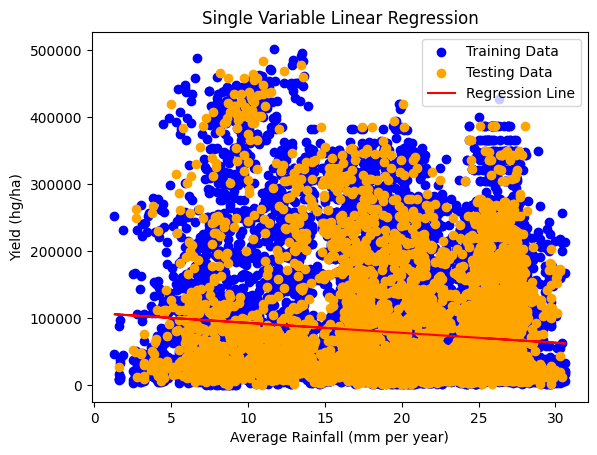

In [ ]:
# Single Variable Linear Regression
X_train = df[['avg_temp']]
y_train = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_[0][0]  
b = model.intercept_[0]

print(f"Model equation: y = {w:.2f}x + {b:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
acc = (model.score(X_train , y_train)*100)
print(f'The accuracy of the Train Model is {acc:.2f}')
acc =(model.score(X_test , y_test)*100)
print(f'The accuracy of the Test Model is {acc:.2f}')   

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


# Plot the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Testing Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Yield (hg/ha)')
plt.title('Single Variable Linear Regression')
plt.legend()
plt.show()



Model equation: y = -7707.10*Item + 104.19*Area + 3.09*average_rain_fall_mm_per_year + 0.12*pesticides_tonnes + -1857.17*avg_temp + 136372.67
The accuracy of the Train Model is 7.53%
The accuracy of the Test Model is 7.80%
Mean Squared Error: 6687860316.68
R^2 Score: 0.08


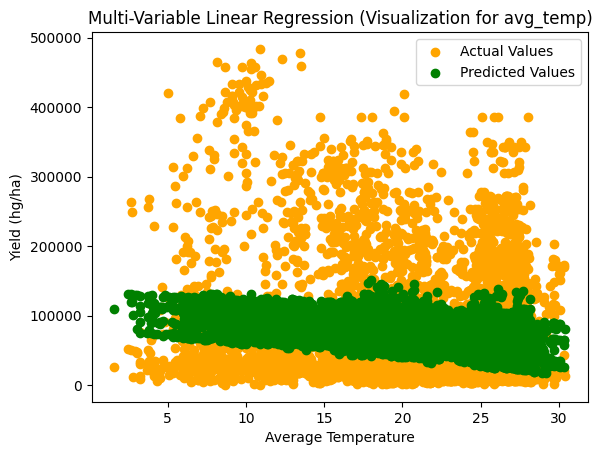

In [35]:
# Mutlivariable Linear Regression

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

feature_names = X.columns
equation = "y = " + " + ".join([f"{coefficients[i]:.2f}*{feature_names[i]}" for i in range(len(coefficients))]) + f" + {intercept:.2f}"
print("Model equation:", equation)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

train_acc = model.score(X_train, y_train) * 100
test_acc = model.score(X_test, y_test) * 100

print(f'The accuracy of the Train Model is {train_acc:.2f}%')
print(f'The accuracy of the Test Model is {test_acc:.2f}%')
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.scatter(X_test['avg_temp'], y_test, color='orange', label='Actual Values')
plt.scatter(X_test['avg_temp'], y_pred, color='green', label='Predicted Values')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha)')
plt.title('Multi-Variable Linear Regression (Visualization for avg_temp)')
plt.legend()
plt.show()


The accuracy of the Train Model is 82.73%
The accuracy of the Test Model is 82.67%
Mean Squared Error: 1256828460.34
R^2 Score: 0.83


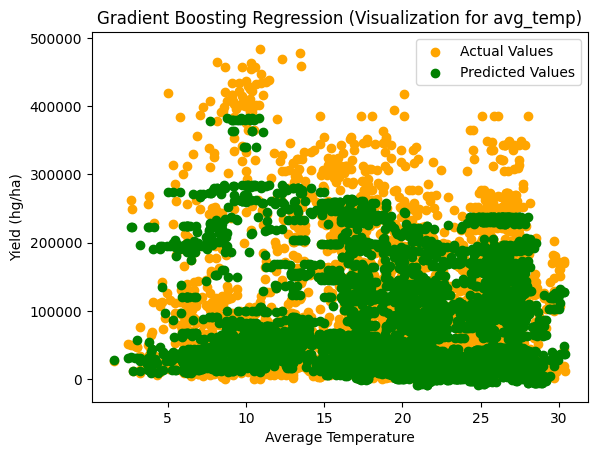

In [46]:
# Gradient Boost

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

train_acc = model.score(X_train, y_train) * 100
test_acc = model.score(X_test, y_test) * 100

print(f'The accuracy of the Train Model is {train_acc:.2f}%')
print(f'The accuracy of the Test Model is {test_acc:.2f}%')
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.scatter(X_test['avg_temp'], y_test, color='orange', label='Actual Values')
plt.scatter(X_test['avg_temp'], y_pred, color='green', label='Predicted Values')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha)')
plt.title('Gradient Boosting Regression (Visualization for avg_temp)')
plt.legend()
plt.show()



Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


565/565 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 11519228928.0000 - mae: 71031.9766 - val_loss: 6891362816.0000 - val_mae: 62891.7695
Epoch 2/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 6485414400.0000 - mae: 60406.1289 - val_loss: 6742872064.0000 - val_mae: 61974.4844
Epoch 3/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 6628715008.0000 - mae: 61325.8203 - val_loss: 6676197376.0000 - val_mae: 61481.3750
Epoch 4/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 6524739072.0000 - mae: 60910.4180 - val_loss: 6645829120.0000 - val_mae: 60663.7422
Epoch 5/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 6630086656.0000 - mae: 60865.2656 - val_loss: 6618057728.0000 - val_mae: 61254.1680
Epoch 6/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 6431729664.0000 - mae: 60468.8555 - val_loss: 6600516096.0000 - val_mae: 61381.9688
Epoch 7/500
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 6504029696.0000 - mae: 60830.2656 - val_loss: 6582571520.0000 - va

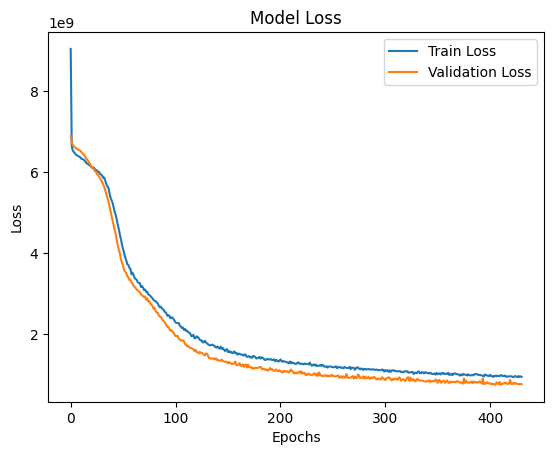

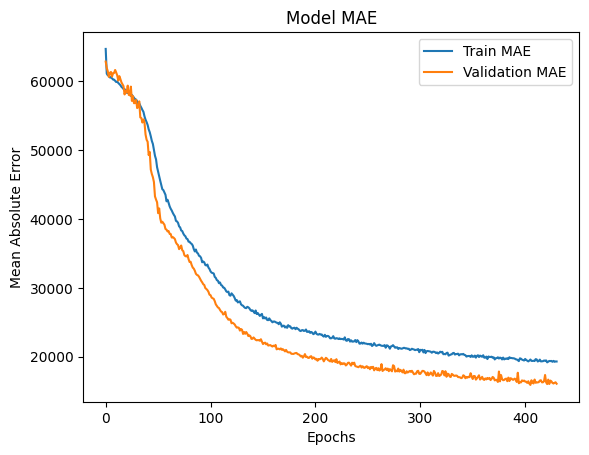

In [48]:
# Neural Network

X = df[['Item', 'Area', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df[['hg/ha_yield']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, verbose=1, callbacks=[early_stop])

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_acc = r2_score(y_train, model.predict(X_train)) * 100
test_acc = r2 * 100

print(f"Train Accuracy (R^2): {train_acc:.2f}%")
print(f"Test Accuracy (R^2): {test_acc:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


The accuracy of the Linear Regression Model Train is 1.28
The accuracy of the  Linear Regression Model Test is 1.09


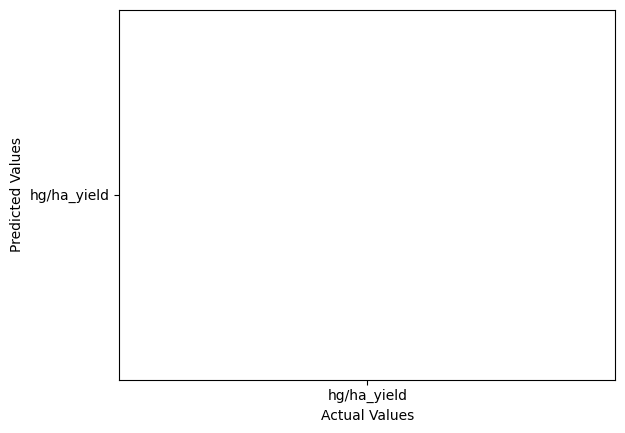

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of the Random Forest Model Train is 15.23
The accuracy of the  Random Forest Model Test is -11.40


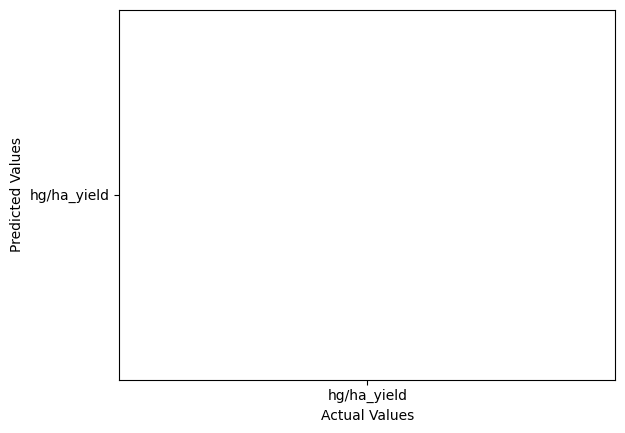

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


The accuracy of the Gradient Boost Model Train is 4.58
The accuracy of the  Gradient Boost Model Test is 2.23


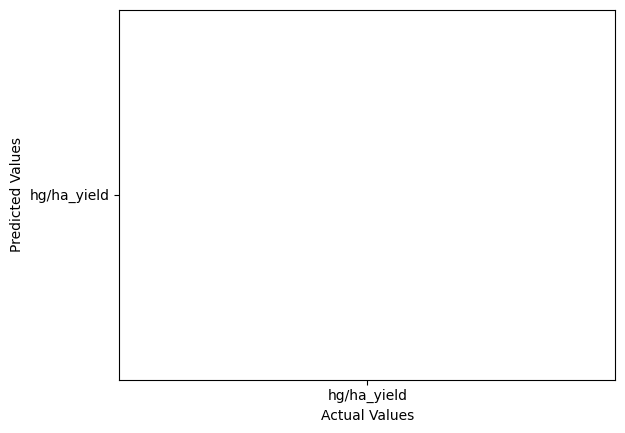

The accuracy of the XGBoost Model Train is 4.08
The accuracy of the  XGBoost Model Test is 1.54


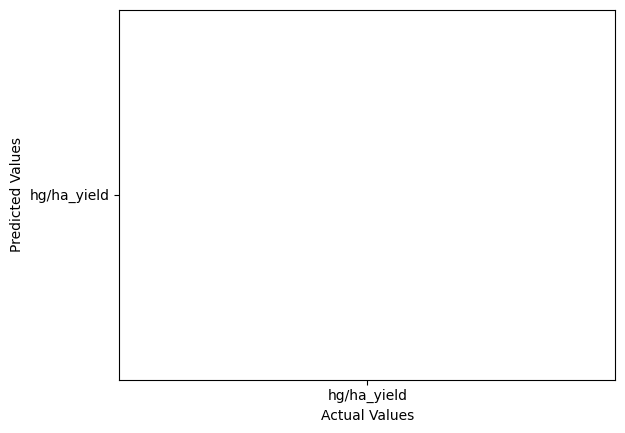

The accuracy of the KNN Model Train is 2.96
The accuracy of the  KNN Model Test is -18.79


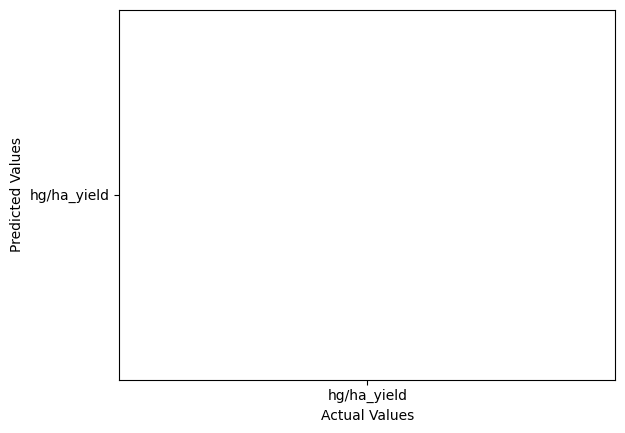

The accuracy of the Decision Tree Model Train is 15.59
The accuracy of the  Decision Tree Model Test is -13.78


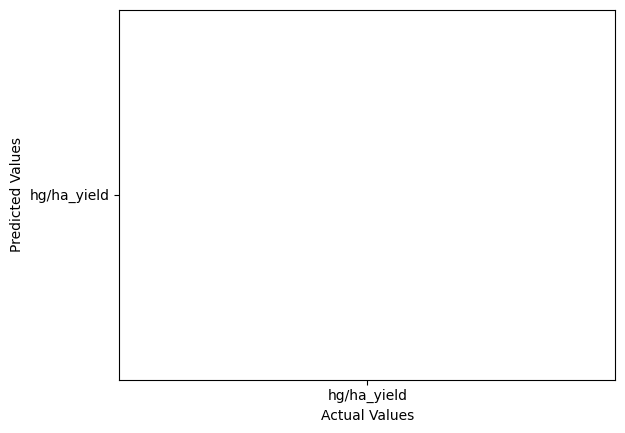

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


The accuracy of the Bagging Regressor Model Train is 15.28
The accuracy of the  Bagging Regressor Model Test is -11.27


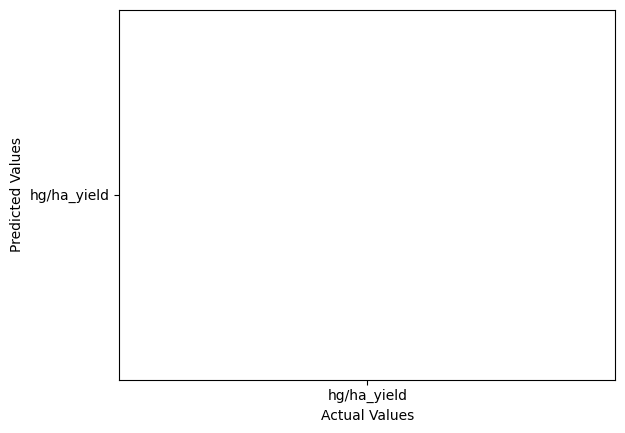

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.010896,7245274709.304132,0.010896
1,Random Forest,-0.114008,8160203128.551316,-0.114008
2,Gradient Boost,0.022310,7161666599.463605,0.022310
3,XGBoost,0.015394,7212324352.000000,0.015394
4,KNN,-0.187925,8701653847.780071,-0.187925
5,Decision Tree,-0.137760,8334195330.488889,-0.137760
6,Bagging Regressor,-0.112677,8150455804.439436,-0.112677


In [30]:
#IGNORE
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()


dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)